:**<font size=6>Practice. Module4</font>**

## <font color=green size = 4><h3><b>**Task description**</b><font>

<font color=green><h5><b>About the task:</b><font>

**Predictive Regression Modeling**: forecast property prices based on various features like location, size, and etc.

You’re provided with a dataset containing data about properties for sale in a certain city (you’ve seen the data before in examples in other modules). The dataset is divided into the training and test subsets (with no target values for the objects — you need to predict those). Your target variable is the property price 'price', a numerical feature. You need to predict it in the test dataset.






<font size=4><h3><b>About the solution and the baseline
</b><font>

You can solve the task using the pipeline we’ve studied in the course. You need to apply the preprocessing and target prediction methods from the regression task module. To help you approach the task, we’ll describe the baseline prediction on slightly preprocessed data using linear regression, and also highlight the problems in the dataset and the starting points for your experiments.
The starter ideas for improving the baseline solution are provided below — we suggest that you explore them first. Pay special attention to data handling and preprocessing, as well as exploratory data analysis (EDA). We also suggest that you look into other linear and non-linear regression prediction algorithms.


<font size=4><h3><b>**How we evaluate your solution**</b><font>

To evaluate your solution, we’ll use the MSE metric on the test sample (test_sample.csv). The column with the true target variable has been deleted in the file. Your task is to predict the target variable value for each object, fill in the submission file, and send it to the LMS for evaluation. Make sure that the order of objects in the submission file is the same as in the test dataset `test_sample.csv` — otherwise, we won’t be able to evaluate your solution. See below for instructions on how to prepare the submission file.
Your need to fill in the `submission.csv` file with predicted values of the target regression variable for each object in the test dataset (that is, the expected price of each property). The LMS will calculate the prediction error and evaluate your solution against a certain error threshold. If your prediction pipeline is effective, you'll be awarded a full score for the task.


<font size=4><h3><b>**Preparing the submission file**</b><font>

Use the code from this notebook to prepare your submission file. Make sure that the order of objects in the submission file is the same as in the test dataset, and that there is only one column with responses from your model. You’ll find the preparation code below the baseline solution. Click [here](https://www.kaggle.com/code/sgwood/step-1-understanding-the-submission-file). for more information about the submission file.


<font size=4><h3><b>**More about uploading the file to the LMS**</b><font>


You need to upload the submission.csv file to the checking system within the LMS. To do this, use the file upload (see the screenshot).


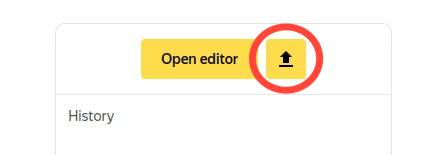

## <font size=4><h3><b>**Metadata**</b><font>

This dataset comprises detailed real estate listings. It includes 2,000 entries with information on property characteristics such as type, size, **price** (target), and other features.

The dataset contains no real-world data.

1. type: type of property (single-family home, condo, etc.)
2. year_built: year in which the property was constructed
3. beds: number of bedrooms
4. baths: total number of bathrooms (including full and half)
5. garage: garage capacity (number of cars)
6. services: tenant satisfaction survey (from 1 to 5)
7. lot_sqft: size of the lot in square feet.
8. sqft: living area size in square feet.
9. floors: number of floors.
10. sold_price: price at which the property was last sold.
11. sold_date: date on which the property was last sold.
12. price: listing price of the property (target).
13. transport: availability of public transport.


## <font size=4><h3><b>**Import Data**</b><font>

In [19]:
# baseline imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

# your code here (other imports)

In [20]:
# import data,  specify path to data

train_sample = pd.read_csv('train_sample.csv')
test_sample = pd.read_csv('test_sample.csv')

In [21]:
test_sample.head()

,sold_date,sold_price,year_built,garage,sqft,type,transport,services,beds,floors,baths,lot_sqft
0,2021-10-14,26.360161,1923.0,2.0,954.000000,single_family,False,5,4.0,2.0,4.0,1219.666667
1,1991-07-09,19.665204,1953.0,2.0,NaN,single_family,False,5,3.0,2.0,3.0,1041.666667
2,NaN,NaN,1935.0,2.0,483.333333,single_family,False,5,3.0,2.0,3.0,1354.666667
3,NaN,NaN,2004.0,2.0,2133.333333,single_family,False,2,6.0,3.0,6.0,1500.000000
4,1994-10-19,27.737955,1913.0,2.0,NaN,single_family,False,5,4.0,2.0,3.0,1250.000000


In [22]:
train_sample.head()

,sold_date,sold_price,year_built,garage,sqft,type,price,transport,services,beds,floors,baths,lot_sqft
0,2005-05-16,46.480370,1966.0,1.0,320.000000,condos,45.503842,False,5,2.0,31.0,1.0,NaN
1,NaN,NaN,2013.0,1.0,NaN,condos,66.400062,False,2,2.0,16.0,2.0,NaN
2,2005-06-17,59.103574,1935.0,2.0,644.000000,single_family,120.926742,True,5,4.0,2.0,3.0,1599.0
3,NaN,NaN,1922.0,NaN,NaN,condos,48.237728,False,2,2.0,3.0,2.0,NaN
4,2000-03-13,11.283478,1961.0,NaN,266.666667,condos,27.813441,False,5,1.0,8.0,1.0,NaN


In [23]:
train_sample['lot_sqft'].value_counts()

lot_sqft
1041.666667    93
1250.000000    62
1016.333333    24
1666.666667    15
1250.333333    12
               ..
1790.333333     1
1775.000000     1
728.333333      1
2573.000000     1
1299.666667     1
Name: count, Length: 368, dtype: int64

In [24]:
train_sample[(train_sample['floors']==6)].head()

,sold_date,sold_price,year_built,garage,sqft,type,price,transport,services,beds,floors,baths,lot_sqft
152,2021-01-26,27.303263,1966.0,NaN,NaN,condos,33.654206,False,2,2.0,6.0,2.0,NaN
178,2019-03-11,175.485476,1921.0,1.0,NaN,condos,177.294705,True,2,3.0,6.0,2.0,NaN
219,2019-03-01,47.283254,1920.0,1.0,260.0,condos,50.909314,False,2,1.0,6.0,1.0,NaN
317,2014-09-22,46.865711,1998.0,1.0,NaN,condos,72.720853,False,2,1.0,6.0,1.0,NaN
388,2006-01-31,19.634918,1966.0,NaN,250.0,condos,25.442973,False,5,1.0,6.0,1.0,NaN


## <font size=4><h3><b>**Exploratory Data Analysis**</b><font>

<font size=4><b>$\alpha$. Preprocessing and EDA</b><font>

<font size=3>Note there are many omissions, duplicates, outliers, and non-informative features in the dataset, so you need to improve its quality for model training. Below, we highlight some of the problems in the data that may degrade the model quality.
Use graphs to explore the data in detail and find relationships that you can later incorporate into the model. Let’s plot a couple of graphs that may be useful for further model building.<font>


In [7]:
train_sample.isnull().sum()

sold_date     464
sold_price    464
year_built    167
garage        577
sqft          450
type            0
price           6
transport       0
services        0
beds           50
floors        297
baths           1
lot_sqft      808
dtype: int64

There are many omissions in the dataset. A naive solution is to fill in the omissions with zeros. Don’t forget to preprocess the test dataset.



In [25]:
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sold_date   1136 non-null   object 
 1   sold_price  1136 non-null   float64
 2   year_built  1433 non-null   float64
 3   garage      1023 non-null   float64
 4   sqft        1150 non-null   float64
 5   type        1600 non-null   object 
 6   price       1594 non-null   float64
 7   transport   1600 non-null   bool   
 8   services    1600 non-null   int64  
 9   beds        1550 non-null   float64
 10  floors      1303 non-null   float64
 11  baths       1599 non-null   float64
 12  lot_sqft    792 non-null    float64
dtypes: bool(1), float64(9), int64(1), object(2)
memory usage: 151.7+ KB


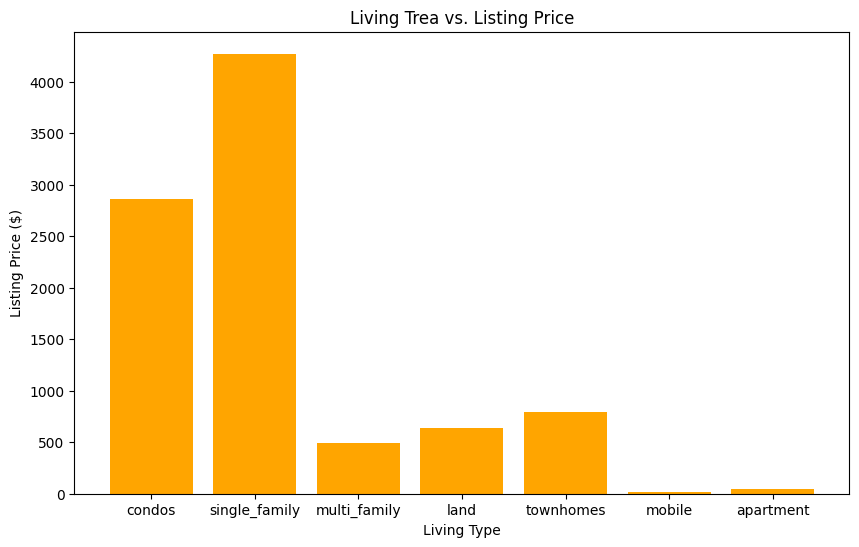

In [27]:
numerical_cols = [cname for cname in train_sample.columns if train_sample[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in train_sample.columns if train_sample[cname].dtype in ['object']]

plt.figure(figsize=(10, 6))
plt.bar(train_sample['type'], train_sample['price'], color='orange')
plt.title('Living Trea vs. Listing Price')
plt.xlabel('Living Type')
plt.ylabel('Listing Price ($)')
plt.show()

In [29]:
# Correlation between numerical data

korelasi = train_sample[numerical_cols].corr()
korelasi

,sold_price,year_built,garage,sqft,price,services,beds,floors,baths,lot_sqft
sold_price,1.000000,0.121954,0.170130,0.653785,0.800727,0.009464,0.222824,0.090617,0.524252,0.043409
year_built,0.121954,1.000000,0.006945,-0.006843,0.118180,-0.044942,-0.245810,0.276045,0.012418,0.023416
garage,0.170130,0.006945,1.000000,0.031659,0.026534,-0.025081,0.014045,0.139864,0.045484,0.005247
sqft,0.653785,-0.006843,0.031659,1.000000,0.832767,-0.039303,0.597771,-0.044446,0.853713,-0.012380
price,0.800727,0.118180,0.026534,0.832767,1.000000,-0.020669,0.257229,0.090871,0.604866,-0.000850
services,0.009464,-0.044942,-0.025081,-0.039303,-0.020669,1.000000,0.053863,0.015196,0.056452,-0.029400
beds,0.222824,-0.245810,0.014045,0.597771,0.257229,0.053863,1.000000,-0.316849,0.646565,-0.017578
floors,0.090617,0.276045,0.139864,-0.044446,0.090871,0.015196,-0.316849,1.000000,-0.081209,0.231148
baths,0.524252,0.012418,0.045484,0.853713,0.604866,0.056452,0.646565,-0.081209,1.000000,-0.030830
lot_sqft,0.043409,0.023416,0.005247,-0.012380,-0.000850,-0.029400,-0.017578,0.231148,-0.030830,1.000000


[]

<Figure size 1500x1000 with 0 Axes>

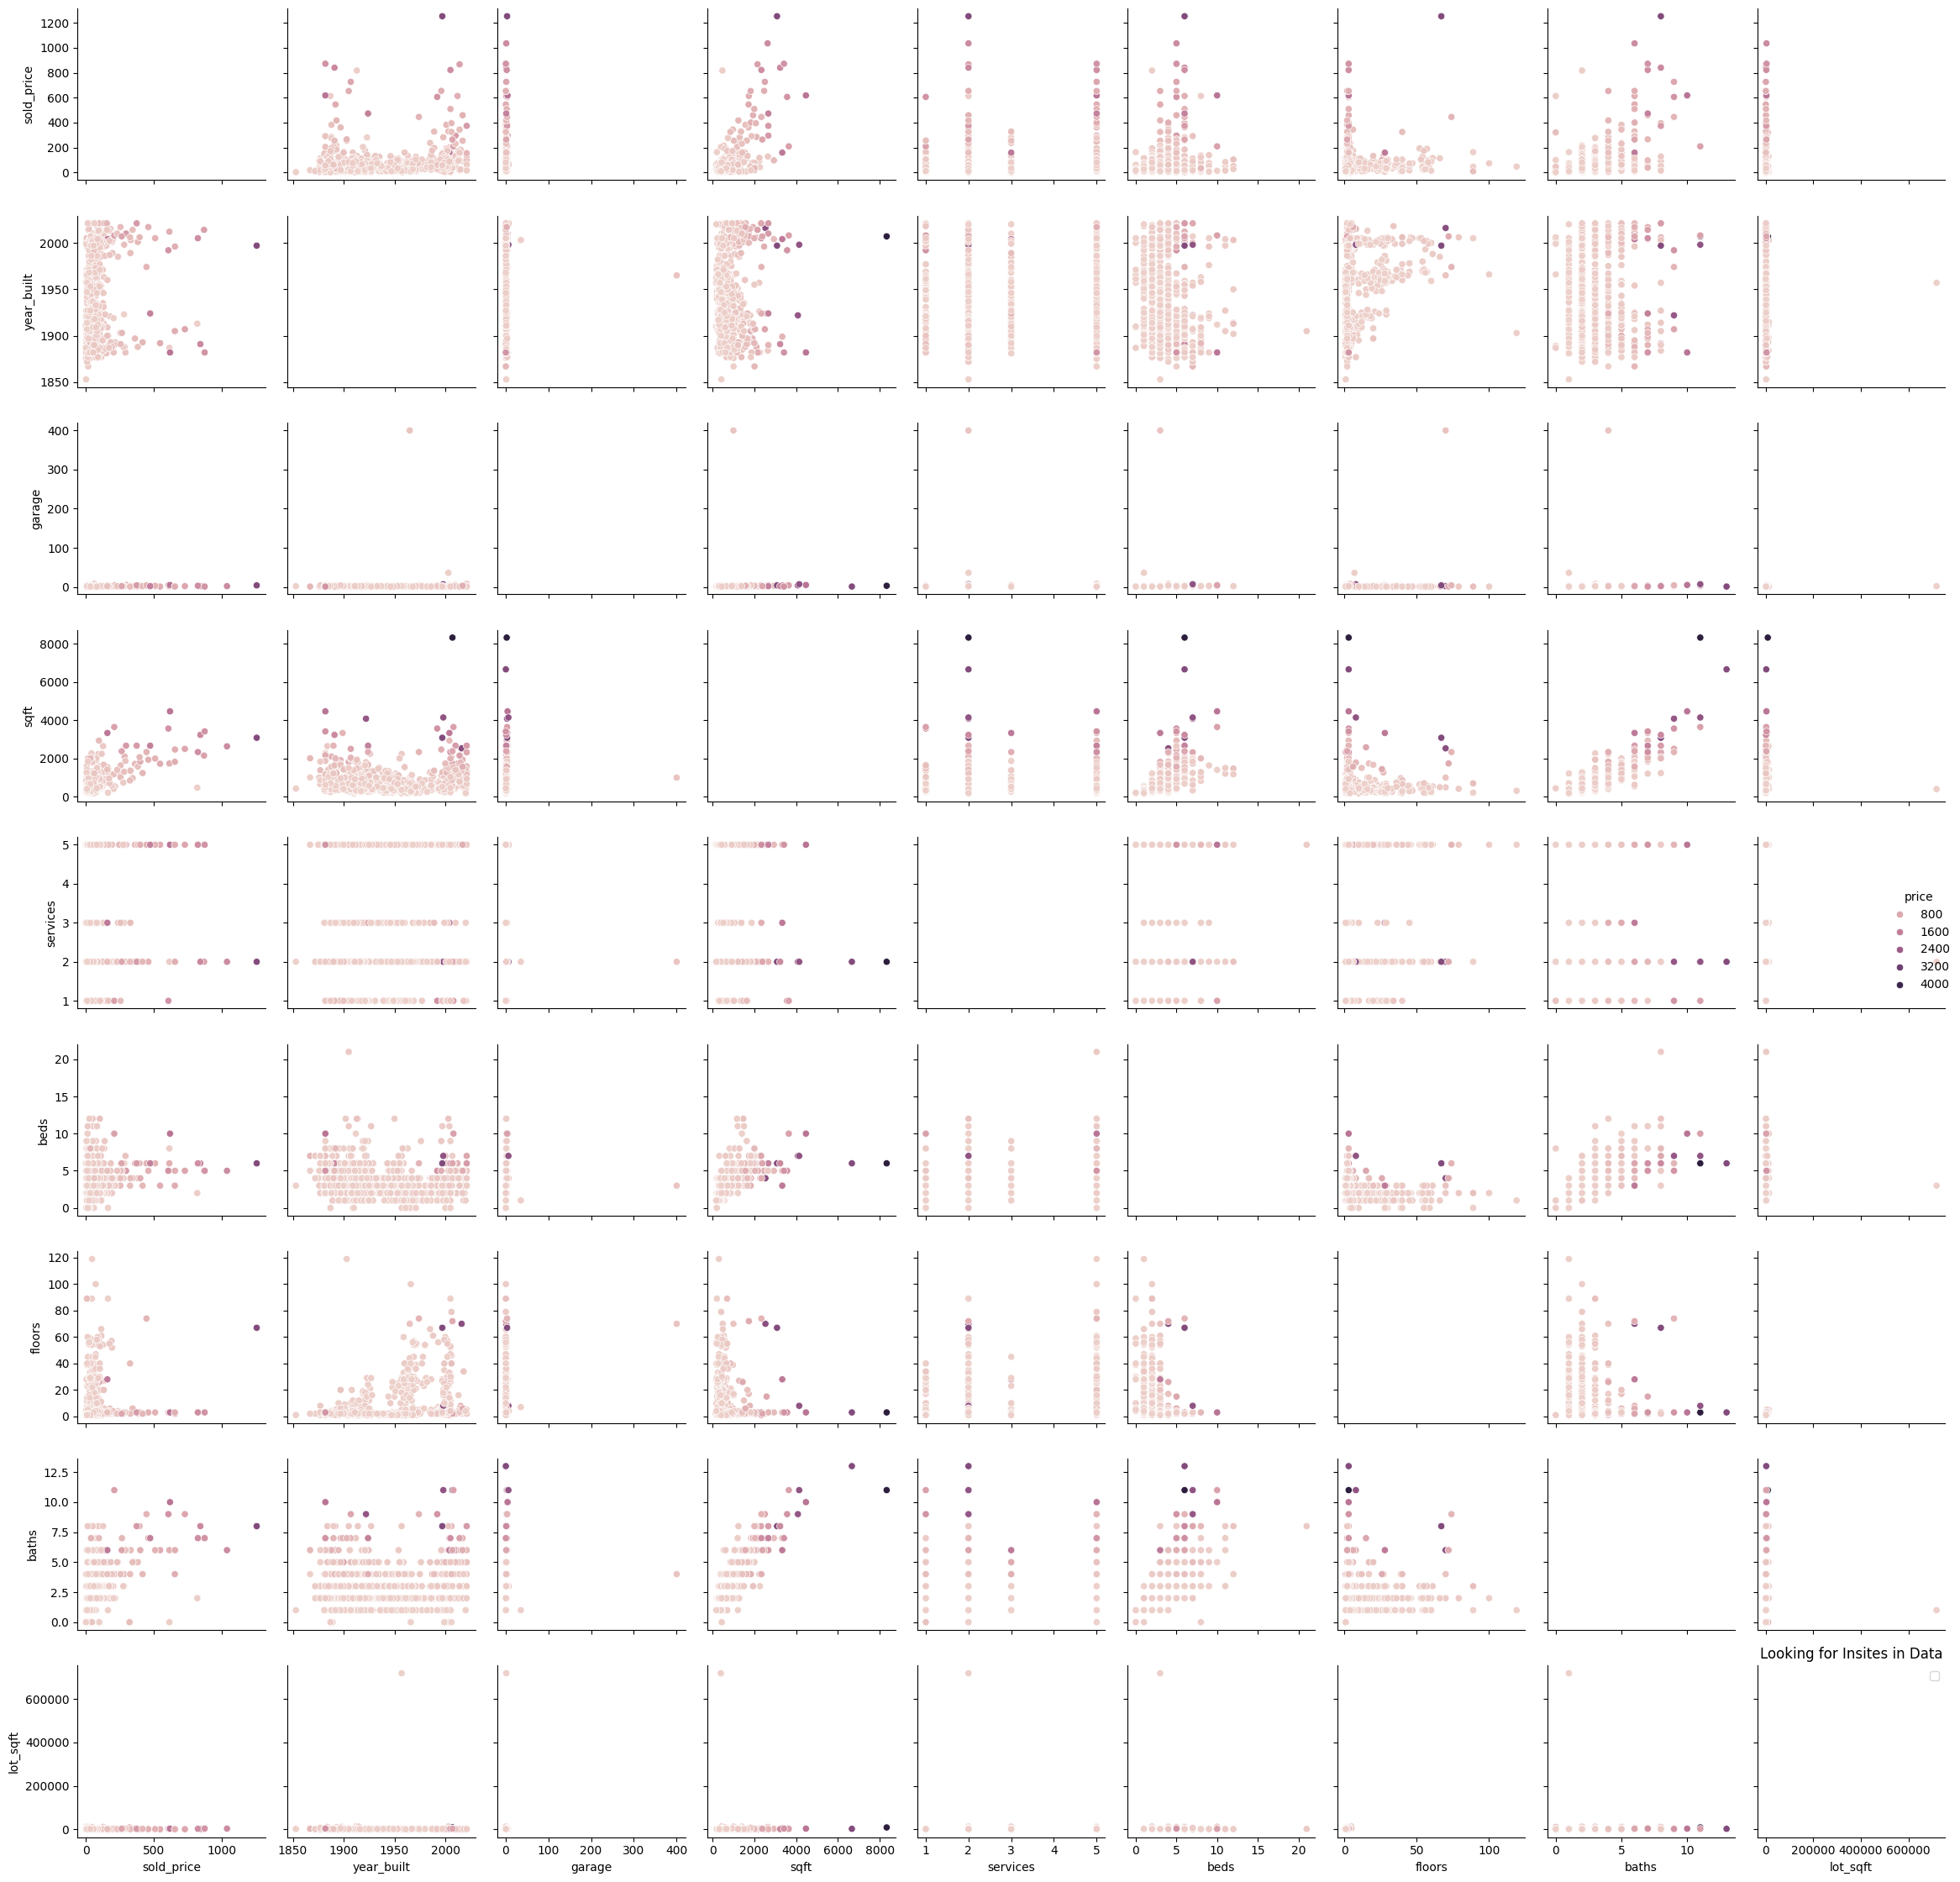

In [48]:
#Checing Multivariate Correlation
plt.figure(figsize=(15,10))
sns.pairplot(train_sample[numerical_cols],hue="price")
plt.title("Looking for Insites in Data")
plt.legend("price")
plt.tight_layout()
plt.plot()

Note that the dependence between the target variable and some other columns may be non-linear (heteroscedastic, for example).

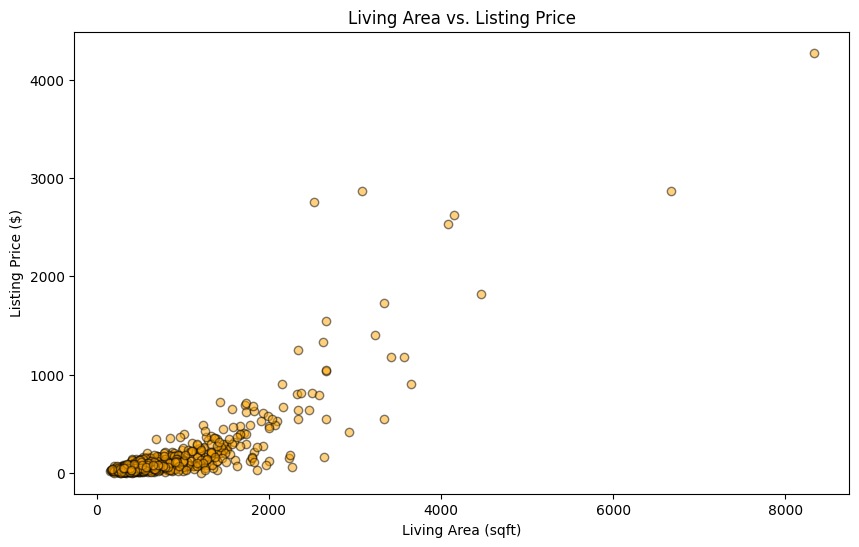

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(train_sample['sqft'], train_sample['price'], color='orange', alpha=0.5, edgecolors='black')
plt.title('Living Area vs. Listing Price')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Listing Price ($)')
plt.show()

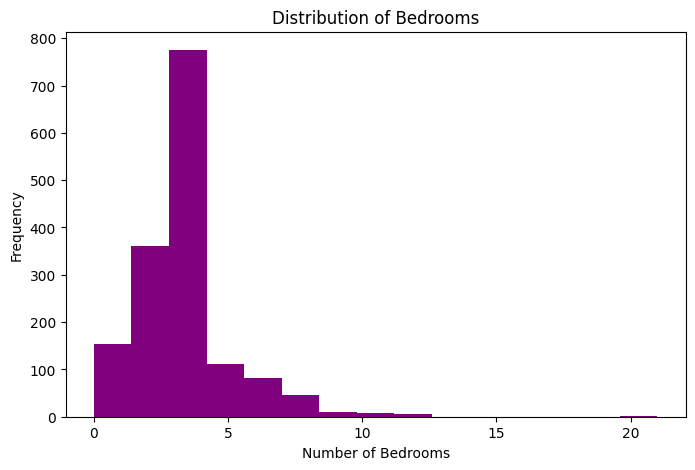

In [50]:
plt.figure(figsize=(8, 5))
plt.hist(train_sample['beds'], bins=15, color='purple')
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.show()

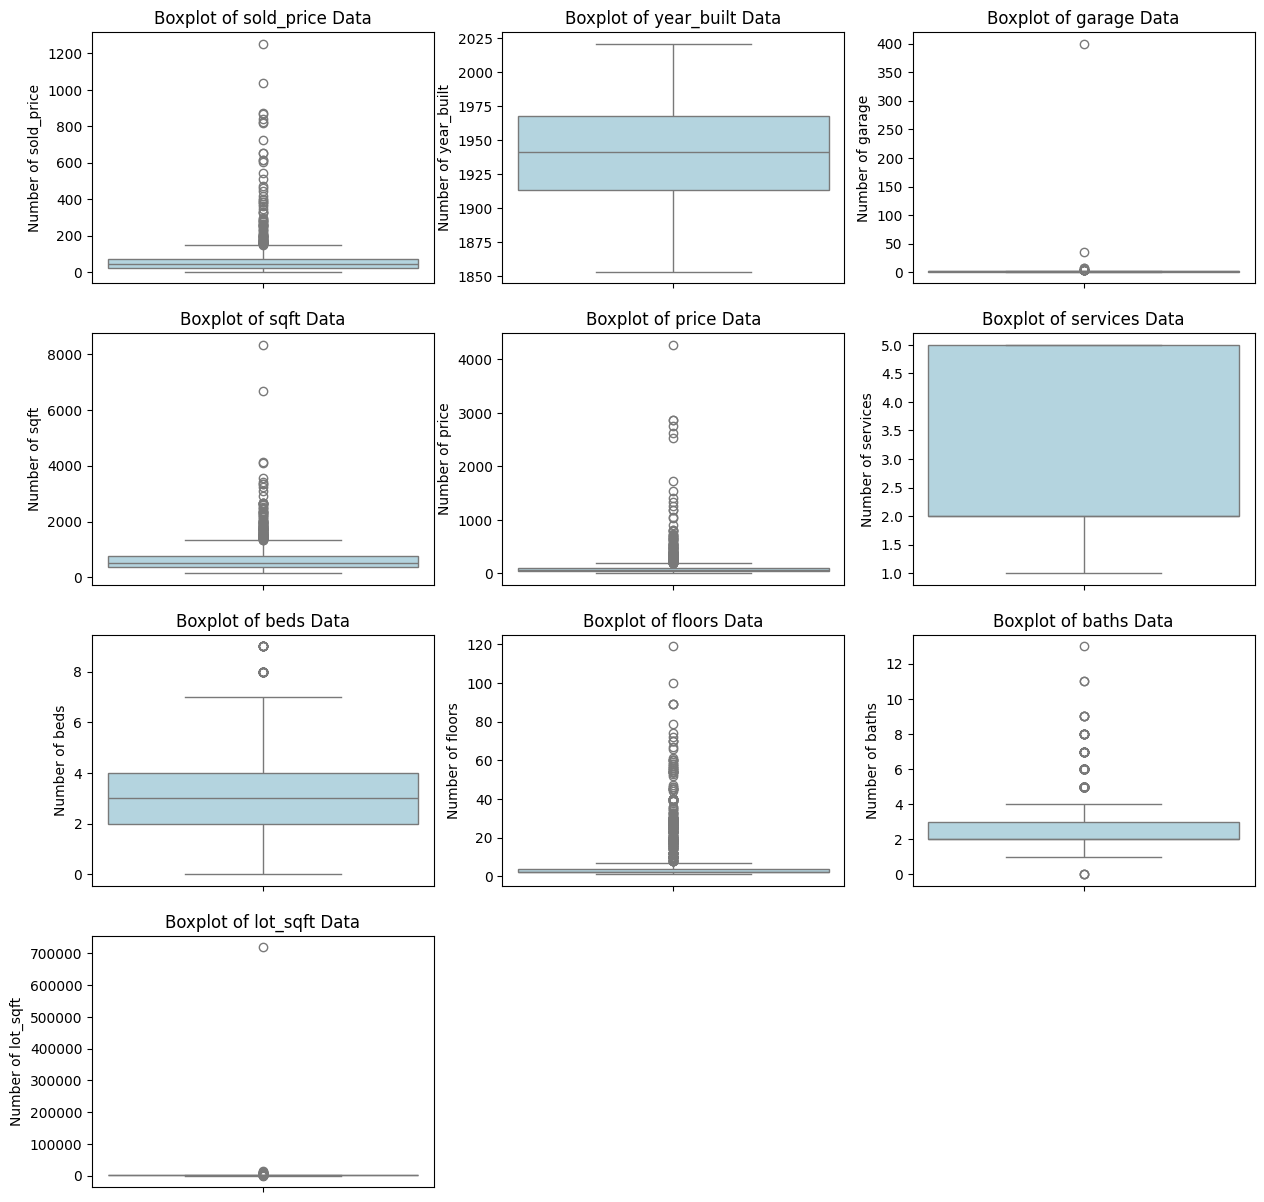

In [59]:
plt.figure(figsize=(15, 15))
for i,col in enumerate(train_sample[numerical_cols].columns,1):
    plt.subplot (4,3,i)
    plt.title(f'Boxplot of {col} Data')
    sns.boxplot(train_sample[col], color='lightblue')
    plt.ylabel(f'Number of {col}')
    plt.plot()

In [83]:
train_sample[train_sample['floors']<=15][['floors']].shape

(1128, 1)

This method of representing data distribution is called box plot (or whisker plot). The graph shows the main variation statistics (median, quartiles, and interquartile range). To improve your model’s performance, preprocess the outliers in the number of beds distribution. Filtering out most outliers.


In [52]:
train_sample = train_sample[train_sample['beds'] < 10]
train_sample

,sold_date,sold_price,year_built,garage,sqft,type,price,transport,services,beds,floors,baths,lot_sqft
0,2005-05-16,46.480370,1966.0,1.0,320.000000,condos,45.503842,False,5,2.0,31.0,1.0,NaN
1,NaN,NaN,2013.0,1.0,NaN,condos,66.400062,False,2,2.0,16.0,2.0,NaN
2,2005-06-17,59.103574,1935.0,2.0,644.000000,single_family,120.926742,True,5,4.0,2.0,3.0,1599.000000
3,NaN,NaN,1922.0,NaN,NaN,condos,48.237728,False,2,2.0,3.0,2.0,NaN
4,2000-03-13,11.283478,1961.0,NaN,266.666667,condos,27.813441,False,5,1.0,8.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,NaN,NaN,1916.0,NaN,NaN,multi_family,69.107512,False,2,6.0,NaN,2.0,1041.666667
1596,2022-08-04,80.853155,1946.0,1.0,433.333333,condos,90.881413,True,5,2.0,10.0,2.0,NaN
1597,2018-08-02,8.920658,1947.0,NaN,400.000000,single_family,26.369894,False,2,3.0,1.0,1.0,NaN
1598,NaN,NaN,2020.0,NaN,178.666667,condos,36.560360,False,2,1.0,4.0,1.0,NaN


In [ ]:
# your code here


## <font size=4><h3><b>**Feature Engineering**</b><font>

### <font size=3><h3><b>**Modify Columns**</b><font>

In [88]:
data_full_shape = train_sample.shape + test_sample.shape
print (data_full_shape)

(1536, 13, 400, 12)


In [87]:
# Concate training sample with test sample
data_full = pd.concat([train_sample, test_sample])

# Drop Unnecessary Columns
data_full.drop(columns=['price', 'lot_sqft'], axis=1, inplace=True)

data_full.shape

(1936, 11)

In [ ]:
# Change 'Sold_date' to year

data_full['sold_date'] = pd.to_datetime(data_full['sold_date'])
data_full['sold_date'] = data_full['sold_date'].dt.year

In [90]:
data_full.head()

,sold_date,sold_price,year_built,garage,sqft,type,transport,services,beds,floors,baths
0,2005.0,46.480370,1966.0,1.0,320.000000,condos,False,5,2.0,31.0,1.0
1,NaN,NaN,2013.0,1.0,NaN,condos,False,2,2.0,16.0,2.0
2,2005.0,59.103574,1935.0,2.0,644.000000,single_family,True,5,4.0,2.0,3.0
3,NaN,NaN,1922.0,NaN,NaN,condos,False,2,2.0,3.0,2.0
4,2000.0,11.283478,1961.0,NaN,266.666667,condos,False,5,1.0,8.0,1.0


### <font size=3><h3><b>**Handling Missing Value**</b><font>

### <font size=3><h3><b>**Encoding**</b><font>

### <font size=3><h3><b>**Scaling**</b><font>

#### <font size=3><h3><b>**Preprocessor Pipeline**</b><font>


In [138]:
# put the target of the training dataset into a separate variable and remove it from the training set
y = train_sample['price'].fillna(train_sample['price'].median())
X = data_full[0:1536]

X_valid = data_full[1536:1936]
y.isnull().sum()

0

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Define columns
mean_cols = ['sqft']         # Use mean
median_cols = ['sold_price']         # Use median
mode_cols = ['year_built','beds','floors','sold_date','baths'] # Use most frequent (mode)
fill_nums = ['garage']

# Use One Hot Encoder to Categorical
need_OH_col = ['type']

preprocessor = ColumnTransformer(transformers=[
    ('mean_imputer', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', RobustScaler())
    ]), mean_cols),

    ('median_imputer', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler())
    ]), median_cols),

    ('mode_imputer', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('scaler', StandardScaler())
    ]), mode_cols),

    ('fillnums_imputer', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('scaler', StandardScaler())
    ]), fill_nums),

    ('OH_encoder', OneHotEncoder(handle_unknown='ignore'), need_OH_col)
])

## <font size=4><h3><b>**ML Model**</b><font>

### <font size=3><h3><b>**Train Test Split**</b><font>

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=23)

### <font size=3><h3><b>**Choosing Model**</b><font>

#### <font size=4><h3><b>**Linear Regression**</b><font>

In [169]:
# Using Linear Regression
from sklearn.linear_model import LinearRegression


clf_linear = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression(fit_intercept=True))
])

type(X_train)
# Preprocessing of training data, fit model 
clf_linear.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
y_preds = clf_linear.predict(X_test)

# Calculate Mean Squared Error
mse_lr = mse(y_preds, y_test)

print(f'The MSE: {mse_lr}')

np.sqrt(mse_lr)

The MSE: 13912.95819840223


117.95320342577487

#### <font size=4><h3><b>**XGB Regressor**</b><font>

In [162]:
# Using Linear Regression
from xgboost import XGBRegressor


clf_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(n_estimators =150, learning_rate = 0.2, random_state=41))
])

type(X_train)
# Preprocessing of training data, fit model 
clf_xgb.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
y_preds = clf_xgb.predict(X_test)

# Calculate Mean Squared Error
mse_xgb = mse(y_preds, y_test)

print(f'The MSE: {mse_xgb}')

The MSE: 7421.071651533995


In [163]:
np.sqrt(mse_xgb)

86.14564209252836

#### <font size=4><h3><b>**Ridge**</b><font>

In [170]:
from sklearn.linear_model import Ridge  # or Lasso, or ElasticNet

model_ridge = Ridge(alpha=1.0)

clf_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model_ridge)
])

clf_ridge.fit(X_train, y_train)
y_preds = clf_ridge.predict(X_test)

# Calculate Mean Squared Error
mse_ridge = mse(y_preds, y_test)

print(f'The MSE: {mse_ridge}')

The MSE: 13839.623759957654


#### <font size=4><h3><b>**Ridge CV**</b><font>

In [171]:
from sklearn.linear_model import RidgeCV

model_cv = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)

In [173]:
clf_ridgeCV = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model_cv)
])

clf_ridgeCV.fit(X_train, y_train)
y_preds = clf_ridgeCV.predict(X_test)

# Calculate Mean Squared Error
mse_ridgeCV = mse(y_preds, y_test)

print(f'The MSE: {mse_ridgeCV}')
np.sqrt(mse_ridgeCV)

The MSE: 12851.205094902587


113.36315580867792

<font color=green><H3><b>$\gamma$. Model: fitting weights </b></H2>
</font>

<font color=green> Now let’s train a linear regression model on the data and look at the model weights.
</font>

## <font color=green size=4><H3><b>$\delta$. Model: evaluation and submit</b></H2>
</font>

<font color=green> Evaluate the model using a selected metric (for example, MSE). Fill in the submission.csv file with the prediction data generated by the model and submit it to the LMS.</font>

In [ ]:
# np.sqrt(mse_lr)

101.00165063006195

In [ ]:
#submission
# y_hat_test = clf_xgb.predict(X_valid)
# pd.DataFrame(y_hat_test).to_csv('submission.csv') # save csv-file to root/submission.csv

<font color=green>Send the submission file to the LMS.<font color=green>

<font color=green><h3><b>$\epsilon$. 💡**Starter Ideas**</b></h3></font>



1. **Preproccesing**: thoroughly preprocess the data, removing duplicates and filling in the omissions with more complex rules (for example, use the mode for each feature).
2. **EDA**: explore the distribution of the object features, remove outliers, and carefully examine the target variable. Exploratory data analysis may yield more important insights than any machine learning model, because your findings have will have one invaluable quality — interpretability. You may want take a closer look at the discrete distributions of categorical features, as well as the number of unique feature values and how informative the variable is. Examine shifts in variable values, including in different datasets (training and test).
3. **Tuning model, validation set**: for the final stage, a model is usually evaluated on a validation set rather than on a training dataset. A part of the training dataset is put aside for the validation set, and the model is trained on the remaining data. Validation sets are also useful for tuning hyperparameters (for example, using cross-validation) for optimal model performance.
4. **Other linear (and non-linear) models**: try out different approaches to linear models (Ridge, Lasso, SGDRegressor, MLPRegressor).
5. **Robust algorithms**: Try using more robust (noise-tolerant) prediction algorithms. For example, you may try to thoroughly analyze the data and describe the target variable with decision algorithms (match-case statement, if-else, decision trees).
